In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import textblob
from textblob import TextBlob

In [2]:
dataset=pd.read_csv('Evaluation-dataset.csv')
dataset

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10126,"I ordered the wrong tyres, however [REDACTED] ...",refund positive,delivery punctuality positive,refund timescale positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10127,"Good experience, first time I have used [REDAC...",length of fitting positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10128,"I ordered the tyre I needed on line, booked a ...",location positive,delivery punctuality positive,length of fitting positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10129,Excellent service from point of order to fitti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
columns_to_drop = ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 
                   'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 
                   'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']

dataset.drop(columns=columns_to_drop, inplace=True)

In [4]:
dataset

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive
1,Very easy to use and good value for money.,value for money positive,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive
...,...,...,...
10126,"I ordered the wrong tyres, however [REDACTED] ...",refund positive,delivery punctuality positive
10127,"Good experience, first time I have used [REDAC...",length of fitting positive,NaN
10128,"I ordered the tyre I needed on line, booked a ...",location positive,delivery punctuality positive
10129,Excellent service from point of order to fitti...,NaN,NaN


In [5]:
dataset.rename(columns={dataset.columns[0]: 'sentence'}, inplace=True)
dataset.columns

Index(['sentence', 'garage service positive', 'ease of booking positive'], dtype='object')

In [10]:
stop_words = set(stopwords.words('english'))
tokenizer=word_tokenize
lemmatizer=WordNetLemmatizer()

In [11]:
subthemes = {
    'incorrect tyres sent': ['missing tyre', 'wrong tyre', 'incorrect tyre', 'tyre went missing'],
    'garage service': ['garage', 'service', 'staff', 'mechanic', 'deal with'],
    'wait time': ['delay', 'wait', 'waiting time']
}

In [12]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower() 
    text = re.sub(r'[^\w\s]', '', text) 
    words=tokenizer(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words

In [13]:
dataset['processed_text'] = dataset['sentence'].apply(preprocess_text)
print(dataset['processed_text'].head())

0    [easy, tyre, selection, process, competitive, ...
1                      [easy, use, good, value, money]
2                  [really, easy, convenient, arrange]
3    [easy, select, tyre, size, arrange, local, fit...
4    [service, excellent, slight, downside, knowing...
Name: processed_text, dtype: object


In [19]:
def sentiment_analyse(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [23]:
dataset['sentiment'] = dataset['sentence'].apply(sentiment_analyse)

In [24]:
def analyse_subthemes(text):
    themes = {}
    for theme, keywords in subthemes.items():
        for keyword in keywords:
            if keyword in text:
                themes[theme] = sentiment_analyse(text)
    return themes

In [25]:
dataset['subthemes'] = dataset['sentence'].apply(lambda x: analyse_subthemes(x.lower()))
dataset.head()

,sentence,garage service positive,ease of booking positive,processed_text,subthemes,sentiment
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,"[easy, tyre, selection, process, competitive, ...",{'garage service': 'positive'},positive
1,Very easy to use and good value for money.,value for money positive,NaN,"[easy, use, good, value, money]",{},positive
2,Really easy and convenient to arrange,ease of booking positive,NaN,"[really, easy, convenient, arrange]",{},positive
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,"[easy, select, tyre, size, arrange, local, fit...",{},positive
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,"[service, excellent, slight, downside, knowing...","{'garage service': 'positive', 'wait time': 'p...",positive


In [28]:
dataset['sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [30]:
dataset[::-1]

,sentence,garage service positive,ease of booking positive,processed_text,subthemes,sentiment
10130,"Seamless, well managed at both ends. I would r...",NaN,NaN,"[seamless, well, managed, end, would, recommend]",{},positive
10129,Excellent service from point of order to fitti...,NaN,NaN,"[excellent, service, point, order, fitting, co...",{'garage service': 'positive'},positive
10128,"I ordered the tyre I needed on line, booked a ...",location positive,delivery punctuality positive,"[ordered, tyre, needed, line, booked, specifie...",{'garage service': 'positive'},positive
10127,"Good experience, first time I have used [REDAC...",length of fitting positive,NaN,"[good, experience, first, time, used, redacted...",{},positive
10126,"I ordered the wrong tyres, however [REDACTED] ...",refund positive,delivery punctuality positive,"[ordered, wrong, tyre, however, redacted, arra...","{'incorrect tyres sent': 'positive', 'garage s...",positive
...,...,...,...,...,...,...
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,"[service, excellent, slight, downside, knowing...","{'garage service': 'positive', 'wait time': 'p...",positive
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,"[easy, select, tyre, size, arrange, local, fit...",{},positive
2,Really easy and convenient to arrange,ease of booking positive,NaN,"[really, easy, convenient, arrange]",{},positive
1,Very easy to use and good value for money.,value for money positive,NaN,"[easy, use, good, value, money]",{},positive


Text(0.5, 0.92, 'Positive vs Negative Sentiment Distribution')

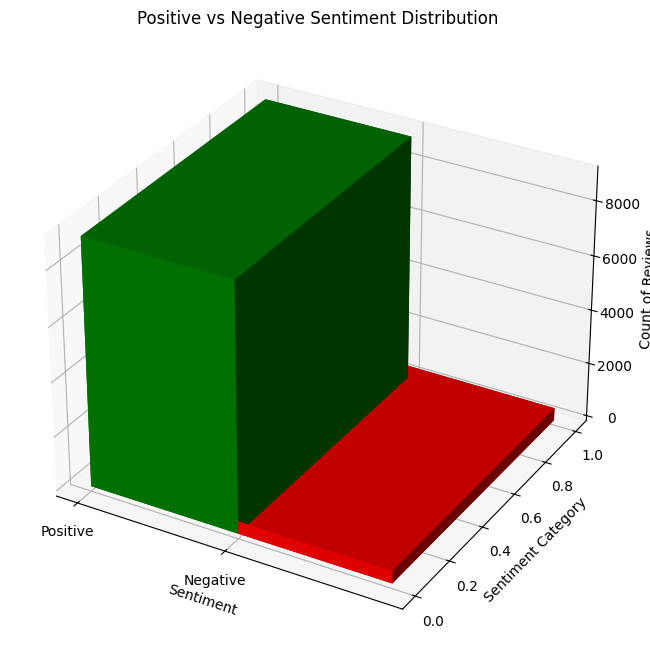

In [35]:
import matplotlib.pyplot as plt
import numpy as np

positive_data = dataset[dataset['sentiment'] == 'positive']
negative_data = dataset[dataset['sentiment'] == 'negative']
positive_count = positive_data.shape[0]
negative_count = negative_data.shape[0]
sentiments = ['Positive', 'Negative']
counts = [positive_count, negative_count]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(len(sentiments))
y_pos = np.zeros(len(sentiments))
z_pos = np.zeros(len(sentiments))
heights = counts

ax.bar3d(x_pos, y_pos, z_pos, 1, 1, heights, color=['g', 'r'])
ax.set_xlabel('Sentiment')
ax.set_ylabel('Sentiment Category')
ax.set_zlabel('Count of Reviews')
ax.set_xticks(x_pos)
ax.set_xticklabels(sentiments)
plt.title('Positive vs Negative Sentiment Distribution')

In [36]:
dataset.to_csv('submission.csv', index=False)